In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer

In [2]:
df = pd.read_csv(r'penguins.csv')

In [3]:
display(df)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
display(df.isnull().sum())
df.dropna(inplace = True)


id                   0
species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
year                 0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 342, dtype: bool

In [8]:
df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,171.701754,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,99.174948,5.459584,1.974793,14.061714,801.954536,0.817168
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.250000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,256.750000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
num_cols = [col for col in df.columns if df[col].dtypes != 'object']
display(num_cols)

['id',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'year']

In [10]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
display(obj_cols)

['species', 'island', 'sex']

In [11]:
skewness = df[num_cols].skew()
skewness

id                   0.005349
bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
year                -0.053965
dtype: float64

In [12]:
df.drop(columns= ['id'],inplace = True)

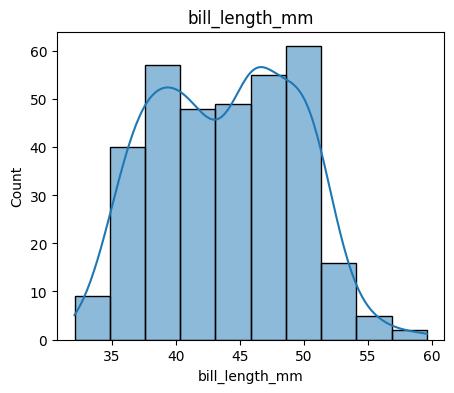

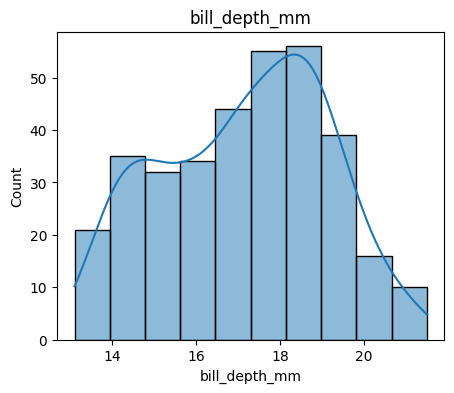

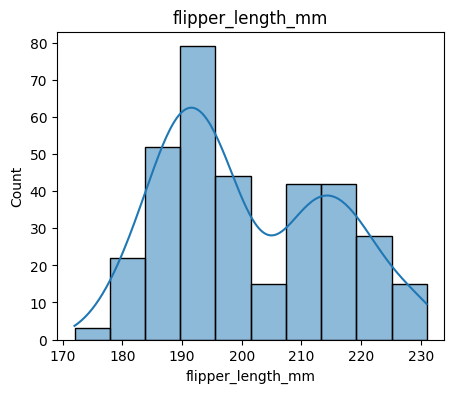

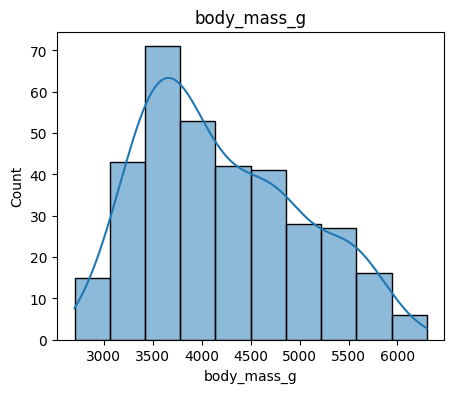

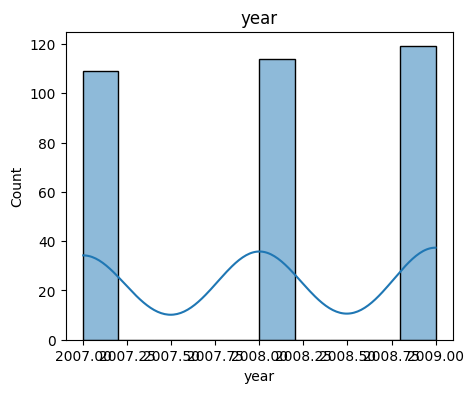

In [13]:
num_cols = [col for col in df.columns if df[col].dtypes != 'object']
for col in num_cols:
    plt.figure(figsize=(5,4))
    snb.histplot(df[col], bins= 10, kde = True)
    plt.title(f"{col}")
    plt.show()

In [14]:
scalar = StandardScaler()
df[num_cols] = scalar.fit_transform(df[num_cols])

In [16]:
display(df)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,-0.884499,0.785449,-1.418347,-0.564142,male,-1.261365
1,Adelie,Torgersen,-0.811126,0.126188,-1.062250,-0.501703,female,-1.261365
2,Adelie,Torgersen,-0.664380,0.430462,-0.421277,-1.188532,female,-1.261365
4,Adelie,Torgersen,-1.324737,1.089724,-0.563715,-0.938776,female,-1.261365
5,Adelie,Torgersen,-0.847812,1.748985,-0.777373,-0.689020,male,-1.261365
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,2.178824,1.343286,0.433355,-0.251947,male,1.189697
340,Chinstrap,Dream,-0.077396,0.481175,0.077258,-1.001215,female,1.189697
341,Chinstrap,Dream,1.041543,0.531887,-0.563715,-0.532923,male,1.189697
342,Chinstrap,Dream,1.261662,0.937586,0.647013,-0.127069,male,1.189697


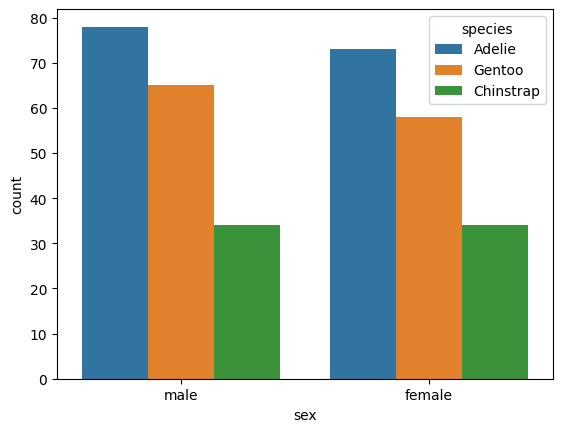

In [19]:
snb.countplot(df,x='sex',hue = 'species')
plt.show()

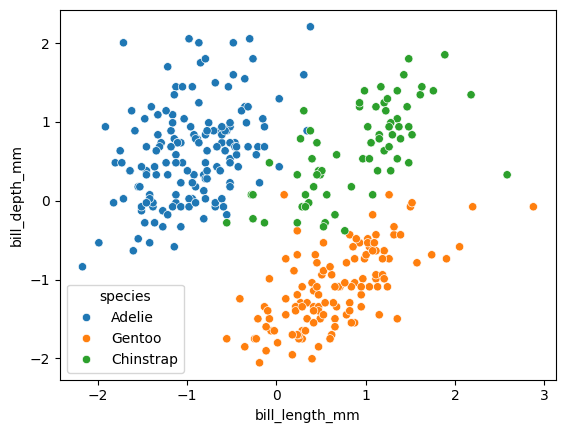

In [20]:
snb.scatterplot(df,x='bill_length_mm',y ='bill_depth_mm',hue = 'species')
plt.show()

<Axes: xlabel='species', ylabel='count'>

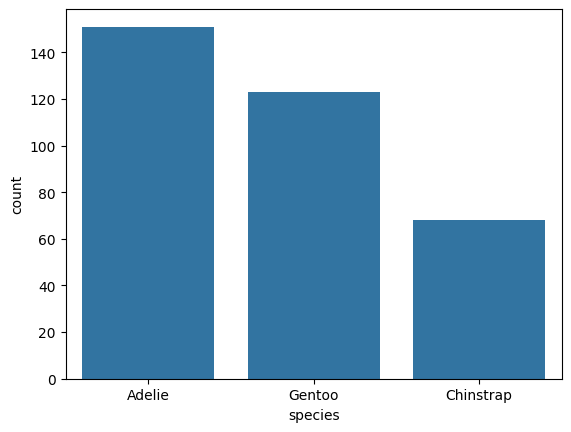

In [18]:
snb.countplot(df,x='species')

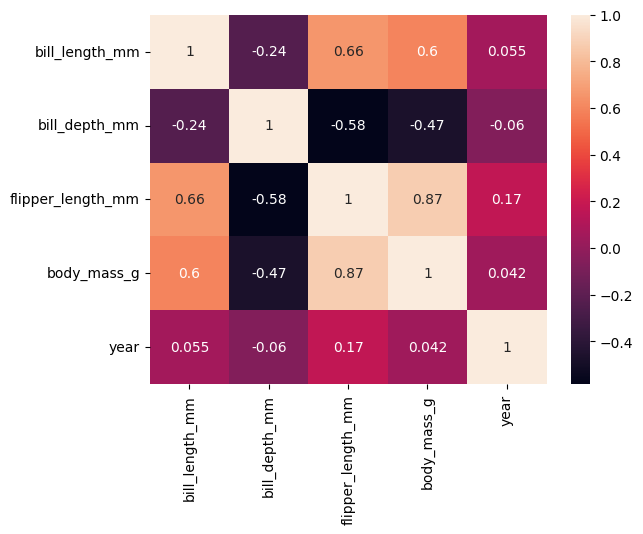

In [22]:
snb.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [15]:
# df[obj_cols]
# pd.get_dummies(df,columns = obj_cols,drop_first = True)